In [2]:
import pandas as pd

In [3]:
l2D = pd.read_csv('ecg2D.csv', header=None)
l2D.shape

(1440, 3)

In [4]:
singnal1 = l2D[0]
singnal2 = l2D[1]
singnal3 = l2D[2]

In [10]:
from scipy.signal import find_peaks as findPeaks
(allPks1,_) = findPeaks(singnal1,prominence=1)
print(allPks1)
(allPks2,_) = findPeaks(singnal2,prominence=1)
print(allPks2)
(allPks3,_) = findPeaks(singnal3,prominence=1)
print(allPks3)

[  55  155  245  423  608  797  975 1173 1375]
[ 177  372  567  751  936 1112 1252 1306]
[  49  302  515  691  909 1099 1289]


Text(0.5, 1.0, 'Signal 3')

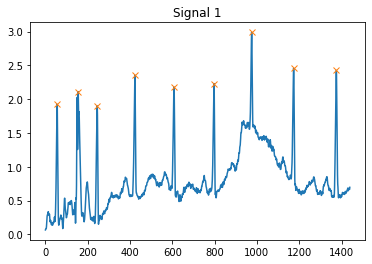

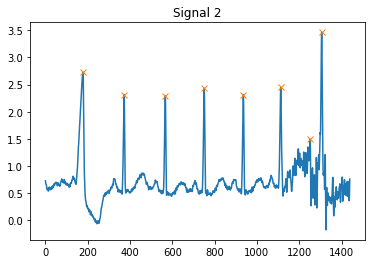

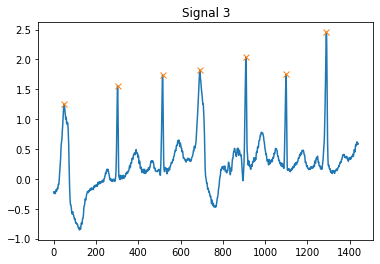

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(singnal1)
plt.plot(allPks1,singnal1[allPks1],'x')
plt.title('Signal 1')
plt.figure()
plt.plot(singnal2)
plt.plot(allPks2,singnal2[allPks2],'x')
plt.title('Signal 2')
plt.figure()
plt.plot(singnal3)
plt.plot(allPks3,singnal3[allPks3],'x')
plt.title('Signal 3')

In [14]:
from scipy import sparse
from scipy.sparse.linalg import spsolve
import numpy as np

def alsbase(y, lam, p, niter=10):
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

<Figure size 432x288 with 0 Axes>

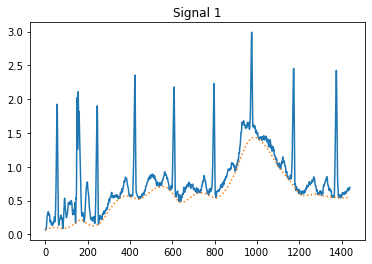

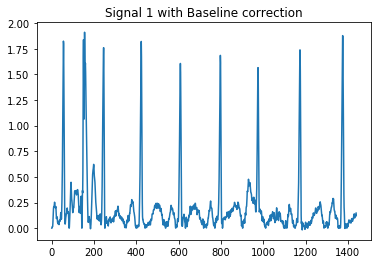

<Figure size 432x288 with 0 Axes>

In [17]:
ecgbase = alsbase(singnal1, 10^5,0.000005,niter=10)

ecgcorr = singnal1-ecgbase
plt.figure()
plt.plot(singnal1)
plt.title('Signal 1')

plt.plot(ecgbase,color="C1", linestyle='dotted')
plt.figure()
plt.plot(ecgcorr)
plt.title('Signal 1 with Baseline correction')
plt.figure()

<Figure size 432x288 with 0 Axes>

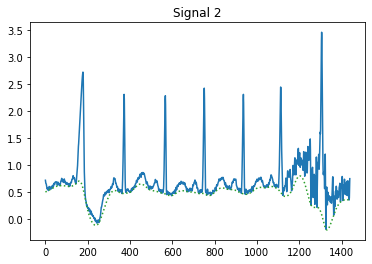

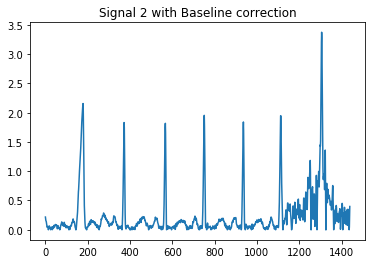

<Figure size 432x288 with 0 Axes>

In [18]:
ecgbase = alsbase(singnal2, 10^5,0.00005,niter=20)

ecgcorr = singnal2-ecgbase
plt.plot(singnal2)
plt.plot(ecgbase,color="C2",linestyle='dotted')
plt.title('Signal 2')
plt.figure()
plt.plot(ecgcorr)
plt.title('Signal 2 with Baseline correction')
plt.figure()

<Figure size 432x288 with 0 Axes>

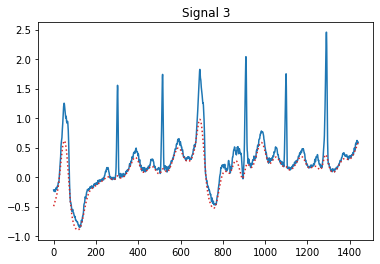

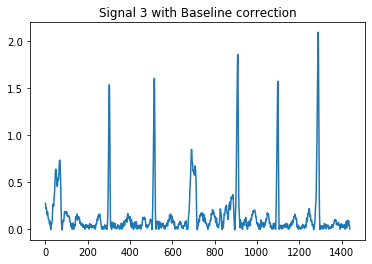

<Figure size 432x288 with 0 Axes>

In [19]:
ecgbase = alsbase(singnal3, 10^5,0.0005,niter=50)

ecgcorr = singnal3-ecgbase
plt.plot(singnal3)
plt.plot(ecgbase,
color="C3",
linestyle='dotted')
plt.title('Signal 3')
plt.figure()
plt.plot(ecgcorr)
plt.title('Signal 3 with Baseline correction')
plt.figure()